## Image Gradients
The difference in value between neighboring pixels is called an image gradient.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure
import cv2

In [3]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [4]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [5]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

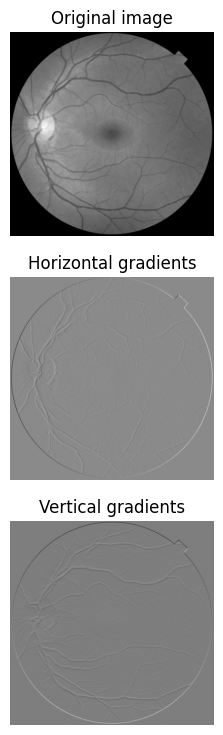

In [6]:
### Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

##  Designing code to compute diagonal gradient of the image used in the example and visualize it

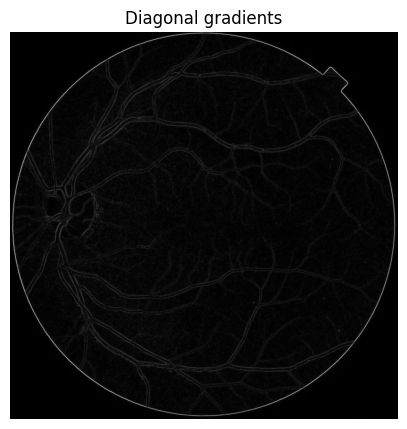

In [7]:
# write your code here
# write your code here

### computing the digonal gradient
gd= np.sqrt(np.power(gx,2)+np.power(gy,2))
fig, ax = plt.subplots(1, figsize=(5, 9), sharex=True, sharey=True)
ax.axis('off')
ax.imshow(gd, cmap=plt.cm.gray)
ax.set_title('Diagonal gradients')
ax.set_adjustable('box')

---

##  HOG image features

In [8]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

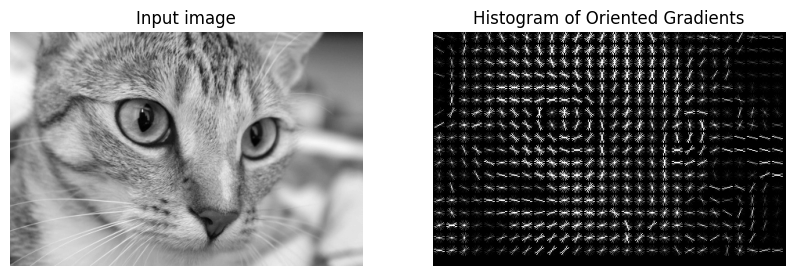

In [9]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>


In [10]:
# write your code here
extractor = cv2.ORB_create()

keypoints, descriptors = extractor.detectAndCompute(data.chelsea(), None)
imageresult = cv2.drawKeypoints(data.chelsea(), keypoints, None, color=(255,0,0), flags=0)


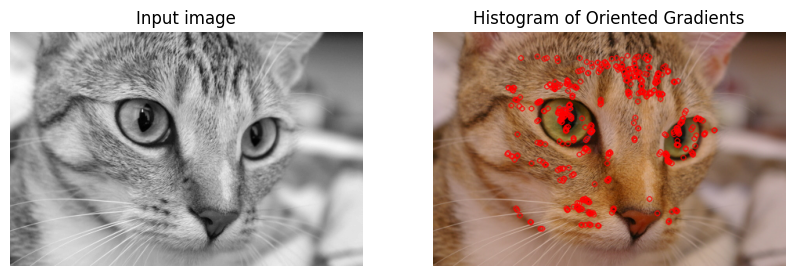

In [11]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(imageresult, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## (Tutorial) Bag-of-Visual-Words
In the tutorial code, we create the code words only based on one image

In [12]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [13]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [14]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'The histogram of visual words')

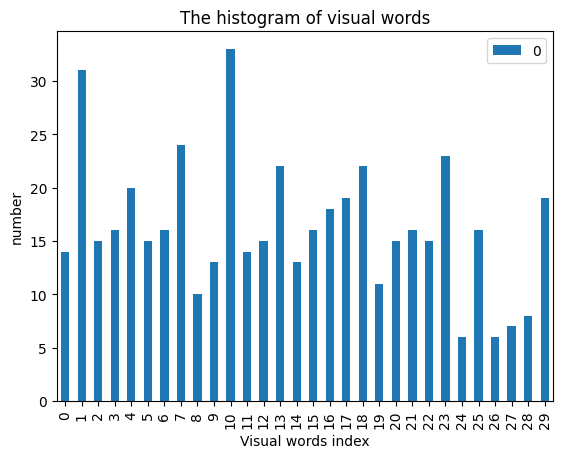

In [15]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

In [16]:
#!pip install matplotlib

In [17]:
!apt install subversion

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,672 kB of archives.
After this operation, 10.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libapr1 amd64 1.7.0-8ubuntu0.22.04.1 [108 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libaprutil1 amd64 1.6.1-5ubuntu4.22.04.2 [92.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libserf-1-1 amd64 1.3.9-10ubuntu2 [50.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libutf8proc2 amd64 2.7.0-3 [73.9 kB]
Get:5 http://archive.

In [18]:
!svn checkout  https://github.com/Achyutanand222/Featureengineerin

svn: E170013: Unable to connect to a repository at URL 'https://github.com/Achyutanand222/Featureengineerin'
svn: E160013: '/Achyutanand222/Featureengineerin' path not found


##  Bag-of-Visual-Words for multiple images
Creating  bag-of-visual-words with 10 images and visualize the histogram of visual words.

In [19]:
#!pip uninstall matplotlib

In [20]:
#!pip install matplotlib

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
# write your code here
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

def features(image_path):
    image = cv2.imread(image_path)
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

def bag_of_words_for_multiple_images(final_df):
  preprocessed_image = []
  for row in final_df.itertuples():
    image_path = row.image_path

    kmeans = KMeans(n_clusters = 30)
    kp, descriptor_list = features(image_path)
    kmeans.fit(descriptor_list)

    keypoint, descriptor = features(image_path)
    if (descriptor is not None):
      histogram = build_histogram(descriptor, kmeans)
      preprocessed_image.append(histogram)
  return preprocessed_image

import glob
dir_list=[]
# This is my path
path = '/content/Featureengineerin/trunk/Dogimages'

for files in glob.glob(path + '/*[0-9].*'):
    dir_list.append(str(files))

dataset_list = list(zip(dir_list))
final_df = pd.DataFrame(dataset_list,columns = ['image_path'])

def visualizing_bag_of_words(preprocessed_image = bag_of_words_for_multiple_images(final_df)):
  for n in range(0,len(preprocessed_image)):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))

    ax1.axis('off')
    ax1.imshow(cv2.imread(dir_list[n]))
    ax1.set_title('Image')

    df = pd.DataFrame(preprocessed_image[n])
    df.plot(ax=ax2, kind='bar');

    ax2.set_xlabel('Visual words index')
    ax2.set_ylabel('number')
    ax2.set_title('The histogram of visual words')

    plt.show()

visualizing_bag_of_words()

---

##  Extract text from image
.

 . Image file name is **ExtractText4.jpeg**


In [23]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 10s (474 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [24]:
!pip install Pillow

In [25]:
from PIL import Image

In [26]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
  import Image

In [29]:
from google.colab import files
uploaded = files.upload()

Saving ExtractText4.jpeg to ExtractText4.jpeg


In [30]:
image_path_in_colab = "/content/ExtractText4.jpeg"
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

oe

Education is the
passport to the future,
for tomorrow belongs
to those who prepare

for it today.

Malcolm X



##  code to implement **ORB** using **OpenCV**. a face image

Keep  face image file name as **faceimg.jpg**


he following during the implementation

* Training image and Testing image

* Number of Keypoints Detected In The Training Image (Not just number image too)

* Number of Keypoints Detected In The Query Image (Not just number image too)

* Number of Matching Keypoints Between The Training and Query Images (Not just number image too)



In [ ]:
## Write your code here
import numpy as np
import cv2

In [ ]:
image1 = cv2.imread('/content/image1.jpeg')
images = cv2.imread('/content/images.jpeg')


In [ ]:
print(image1)

In [ ]:
print(images)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:


# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg
image1 = cv2.imread('/content/image1.jpeg')
images = cv2.imread('/content/images.jpeg')

# Convert it to grayscale
image1_bw = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
images_bw = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(image1_bw,None)
print(queryKeypoints)
trainKeypoints, trainDescriptors = orb.detectAndCompute(images_bw,None)
print(trainKeypoints)

# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(image1, queryKeypoints,
images, trainKeypoints, matches[:20],None)
print(final_img)

final_img = cv2.resize(final_img, (1000,650))

# Show the final image
cv2_imshow(final_img)
cv2.waitKey(3000)
